<h1><center><b><font color ="blue">Text Recognition Using OpenCV and Tesseract OCR</font></b></center></h1>

# Computer Vision
The field of computer vision focuses on replicating parts of human complexity of visual system and enables computers to identify and process object in images videos. It enables interaction between digital and physical images.
### Fields of Use:
<ul>
    <li>Self Driving Cars</li>
    <li>Facial Recognition</li>
    <li>Malicious object detection at Airports</li>
</ul>

Computer Vision is about how computer can gain high level from digital images and videos.

<code>OpenCV</code> stands for Open Source Computer Vision Library. It is an open source library for Machine Learning, Computer Vision and was built to provide a common infrastructure for CV application and to accelerate the use of ML perception. It is a cross platform library
<ul>
    <li>It includes interfaces for C, C++, Java, Python</li>
    <li>It is used to process static images</li>
    <li>It can also be used for processing offline videos and/or streaming videos</li>
</ul>

<code>Tesseract</code> is an Optical Character Recognition(OCR) Engine. It has the ability to recognize words and text. It has been open sourced since 2005.

##### To use <code>OpenCV</code> and <code>Tesseract</code> locally on your system first install it using <code>pip</code>
<code><font size = 1>Double Click</font></code>
<!--- 
!pip install --upgrade pytesseract
!pip install --upgrade opencv-python
-->

In [1]:
#import required python modules
import cv2 # opencv
import pytesseract # tesseract
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

Now read the text image using <code>imread</code> function

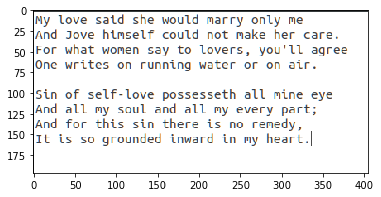

In [2]:
org_img = cv2.imread("Poem.png") #read the text image using imread
plt.imshow(org_img) #display the read image

The result of the <code>imread</code> function is in <code>BGR</code> format which is not promising when using <code>Tesseract OCR</code>.
We us two methods to improve its result
<ol>
    <li>Resizing the Image</li>
    <li>Using Gaussian Blur</li>
</ol>    

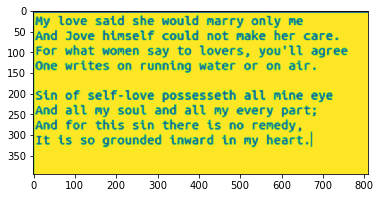

In [3]:
resize_img = cv2.resize(org_img, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC) # Image Resize
filtered_grayscale_img = cv2.cvtColor(resize_img, cv2.COLOR_BGR2GRAY) #Converting to grayscale
gaussian_blur_img = cv2.GaussianBlur(filtered_grayscale_img, (5, 5), 0) #Using Gaussian Blur
plt.imshow(gaussian_blur_img)

Now the text image is passed through the <code>Tesseract OCR Engine</code>

In [4]:
text_img = pytesseract.image_to_string(org_img, lang = 'eng', 
                                      config = '--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890')

In [5]:
print(text_img)

My love said she would marry only me

And Jove himself could not make her care.
For what women say to lovers, you'll agree
lone writes on running water or on air.

Sin of self-love possesseth all mine eye
And all my soul and all my every part;

land for this sin there is no remedy,

It is so grounded inward in my heart.


#### Text Processing

In [6]:
text_img = text_img.replace("\n", " ")
print(text_img)

My love said she would marry only me  And Jove himself could not make her care. For what women say to lovers, you'll agree lone writes on running water or on air.  Sin of self-love possesseth all mine eye And all my soul and all my every part;  land for this sin there is no remedy,  It is so grounded inward in my heart.


In [7]:
text_img = text_img.split(" ")

In [8]:
predicted_text_img = []
for i in text_img:
    predicted_text_img.append(i)

print(predicted_text_img)

['My', 'love', 'said', 'she', 'would', 'marry', 'only', 'me', '', 'And', 'Jove', 'himself', 'could', 'not', 'make', 'her', 'care.', 'For', 'what', 'women', 'say', 'to', 'lovers,', "you'll", 'agree', 'lone', 'writes', 'on', 'running', 'water', 'or', 'on', 'air.', '', 'Sin', 'of', 'self-love', 'possesseth', 'all', 'mine', 'eye', 'And', 'all', 'my', 'soul', 'and', 'all', 'my', 'every', 'part;', '', 'land', 'for', 'this', 'sin', 'there', 'is', 'no', 'remedy,', '', 'It', 'is', 'so', 'grounded', 'inward', 'in', 'my', 'heart.']


In [9]:
" ".join(text_img)

"My love said she would marry only me  And Jove himself could not make her care. For what women say to lovers, you'll agree lone writes on running water or on air.  Sin of self-love possesseth all mine eye And all my soul and all my every part;  land for this sin there is no remedy,  It is so grounded inward in my heart."